In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import timedelta

In [2]:
df = pd.read_csv('meal.csv')
df = df.dropna()

In [3]:
df['DR1_020'] = pd.to_datetime(df['DR1_020'], unit='s').dt.time

In [4]:
oneparticipant = df[0:16][['DR1_020', 'DR1ICARB']].copy()

In [5]:
oneparticipant

,DR1_020,DR1ICARB
0,07:30:00,5.397605e-79
1,07:30:00,3.560000e+00
2,07:30:00,2.320000e+00
3,08:00:00,5.397605e-79
4,09:00:00,4.088000e+01
5,09:00:00,2.500000e-01
6,11:30:00,1.740000e+00
7,12:30:00,4.867000e+01
8,12:30:00,1.170000e+00
9,12:30:00,2.740000e+00


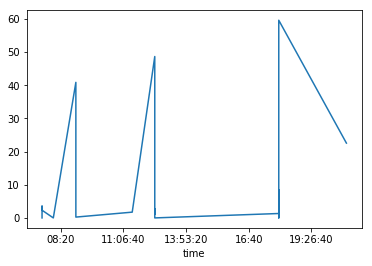

In [6]:
plt.plot(oneparticipant['DR1_020'], oneparticipant['DR1ICARB'])

In [7]:
#plt.scatter(oneparticipant['DR1_020'], oneparticipant['DR1ICARB'])

In [8]:
first_row = pd.DataFrame({'DR1_020': 0,
                        'DR1ICARB': 0}, index =[0]) 
oneparticipant = pd.concat([first_row, oneparticipant]).reset_index(drop = True) 
oneparticipant

,DR1_020,DR1ICARB
0,0,0.000000e+00
1,07:30:00,5.397605e-79
2,07:30:00,3.560000e+00
3,07:30:00,2.320000e+00
4,08:00:00,5.397605e-79
5,09:00:00,4.088000e+01
6,09:00:00,2.500000e-01
7,11:30:00,1.740000e+00
8,12:30:00,4.867000e+01
9,12:30:00,1.170000e+00


In [9]:
oneparticipant = oneparticipant.append({'DR1_020': 0,
                                        'DR1ICARB': 0} , ignore_index=True)

In [10]:
oneparticipant

,DR1_020,DR1ICARB
0,0,0.000000e+00
1,07:30:00,5.397605e-79
2,07:30:00,3.560000e+00
3,07:30:00,2.320000e+00
4,08:00:00,5.397605e-79
5,09:00:00,4.088000e+01
6,09:00:00,2.500000e-01
7,11:30:00,1.740000e+00
8,12:30:00,4.867000e+01
9,12:30:00,1.170000e+00


In [11]:
X = np.array(oneparticipant[0:(len(oneparticipant)-1)])

In [12]:
X

array([[0, 0.0],
       [datetime.time(7, 30), 5.397605346934029e-79],
       [datetime.time(7, 30), 3.56],
       [datetime.time(7, 30), 2.32],
       [datetime.time(8, 0), 5.397605346934029e-79],
       [datetime.time(9, 0), 40.88],
       [datetime.time(9, 0), 0.25],
       [datetime.time(11, 30), 1.74],
       [datetime.time(12, 30), 48.67],
       [datetime.time(12, 30), 1.17],
       [datetime.time(12, 30), 2.74],
       [datetime.time(12, 30), 5.397605346934029e-79],
       [datetime.time(18, 0), 1.33],
       [datetime.time(18, 0), 8.46],
       [datetime.time(18, 0), 5.397605346934029e-79],
       [datetime.time(18, 0), 59.61],
       [datetime.time(21, 0), 22.56]], dtype=object)

In [13]:
y = np.array(oneparticipant[1:(len(oneparticipant))])

In [14]:
y

array([[datetime.time(7, 30), 5.397605346934029e-79],
       [datetime.time(7, 30), 3.56],
       [datetime.time(7, 30), 2.32],
       [datetime.time(8, 0), 5.397605346934029e-79],
       [datetime.time(9, 0), 40.88],
       [datetime.time(9, 0), 0.25],
       [datetime.time(11, 30), 1.74],
       [datetime.time(12, 30), 48.67],
       [datetime.time(12, 30), 1.17],
       [datetime.time(12, 30), 2.74],
       [datetime.time(12, 30), 5.397605346934029e-79],
       [datetime.time(18, 0), 1.33],
       [datetime.time(18, 0), 8.46],
       [datetime.time(18, 0), 5.397605346934029e-79],
       [datetime.time(18, 0), 59.61],
       [datetime.time(21, 0), 22.56],
       [0, 0.0]], dtype=object)

In [15]:
X = np.reshape(X, (X.shape[0], 2, X.shape[1]))

ValueError: cannot reshape array of size 34 into shape (17,2,2)

In [ ]:
X.shape

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(100, input_shape=(2, 1)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [ ]:
model.fit(X, y, epochs=300, batch_size=100, verbose=0)